<a href="https://colab.research.google.com/github/rattlesczck/image-generator/blob/main/image_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install --upgrade diffusers transformers accelerate torch bitsandbytes scipy safetensors xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requi

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

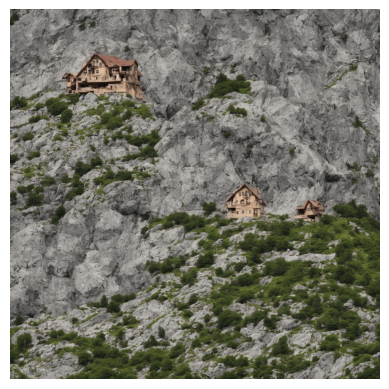

In [9]:
import torch
from diffusers import StableDiffusionPipeline #a prebuilt pipeline for text-to-image generation using Stable Diffusion.
from diffusers import DPMSolverMultistepScheduler  #an optimized scheduler that helps in controlling how the model generates images step-by-step.
import matplotlib.pyplot as plt
torch.cuda.empty_cache()  #Clears the GPU memory cache to ensure GPU has enuf space to run image gen.
model_id = "stabilityai/stable-diffusion-2-1" #id of the model we're using

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)  #replaces the default scheduler with ours (DPMSolverMultistepScheduler)
pipe = pipe.to("cuda")  #transfers entire stable-diffusion pipeline to GPU (cuda enabled)

prompt = "a house on a mountain" #prompt
#recommended : width = 1000 and height = 1000
image = pipe( prompt, width=2000, height = 2000).images[0] #pipeline generates image based on prompt

plt.imshow(image) #displays image
plt.axis('off')
plt.show()
#NOTE: bigger the dimensions of the image, more time will it take for the image to generate,